### (1) Demonstrating Python modules and data structures that can be used to efficiently work with Twitter data

The following python modules can be used to efficiently work with Twitter data:

tweepy (this module will be used in this notebook for our demonstration of the Twitter API for Python)

Python Twitter Tools

python-twitter

twython

TwitterAPI

TwitterSearch

Source: https://stackabuse.com/accessing-the-twitter-api-with-python/
  

Data structures used in the Python API for Twitter
    
Typically, Twitter data is pulled using the JSON data structure which you would have to parse either into csv or a pandas dataframe, depending on your purpose of the results.

In the module used in this demonstration (Tweepy), tweets are pulled as tweepy objects. These objects are then converted into json so that we can parse through keys and values easier to gather tweet metadata.

### (2) Using the Twitter API for Python to download tweets, search tweets by hashtags, extract metadata (i.e. number of reteweets, etc.)

#### Import the necessary libraries

The primary libraries used for Twitter API extraction and analysis are tweepy, csv, and json. Tweepy is the Twitter API library for Python, which is the most mature compared to all python libraries available for the Twitter API. The CSV library is used to save extracted tweets and underlying metadata into. The JSON library is used to parse and format tweet metadata into a format which is easy to manipulate because we can use dict keys and values to extract underlying metadata details.

In [4]:
import tweepy as tw
import datetime
import csv
import json
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import nltk
import matplotlib.pyplot as plt
import preprocessor as p
#!pip install gensim
from gensim.parsing.preprocessing import remove_stopwords
import re
#!pip install wordcloud
from wordcloud import WordCloud, STOPWORDS , ImageColorGenerator

#### State the keys to authenticate to the Twitter API

You will need to setup and be approved for a Developer account in order to receive these keys. These access keys are necessary in order to authenticate into the Twitter API using the tweepy library.

In [5]:
consumer_key= 'crdecmmwhUaTV7oitShaB7xlV'
consumer_secret= 'pEE16H07j9ygOmaxPyJBlW9LUZIrkjOwSyBwhk3DWTS5yZKzEX'
access_token= '1242649299978256389-Ba9M1Nudxuue16nFtGAXuzPk5NNnja'
access_token_secret= 'Skqz04ZBTGAob4K61cHBSay3myFyGLJiCUFPjd7rxyEIk'


#### Authenticate to your Twitter App  

Once you receive your access keys from your Twitter Developer account, pass the access key values into the OAuth handler, which is a function of the tweepy library that allows us to authenticate given acceptable credentials

In [6]:
auth = tw.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tw.API(auth, wait_on_rate_limit=True)

     
users = api.me()
print(users)

User(_api=<tweepy.api.API object at 0x0000027864FD49E8>, _json={'id': 1242649299978256389, 'id_str': '1242649299978256389', 'name': 'Rohith', 'screen_name': 'rohith_so', 'location': 'Toronto, Canada', 'profile_location': None, 'description': 'PhD researcher in Machine Learning @UofT and Cloud security Engineer @Deloitte', 'url': None, 'entities': {'description': {'urls': []}}, 'protected': True, 'followers_count': 3, 'friends_count': 63, 'listed_count': 0, 'created_at': 'Wed Mar 25 03:07:47 +0000 2020', 'favourites_count': 5, 'utc_offset': None, 'time_zone': None, 'geo_enabled': False, 'verified': False, 'statuses_count': 0, 'lang': None, 'contributors_enabled': False, 'is_translator': False, 'is_translation_enabled': False, 'profile_background_color': 'F5F8FA', 'profile_background_image_url': None, 'profile_background_image_url_https': None, 'profile_background_tile': False, 'profile_image_url': 'http://pbs.twimg.com/profile_images/1257200110250921984/a2rubQEa_normal.jpg', 'profile_im

#### Search through tweets by hashtags

We search for the hashtag #wildfires which we define as a search term. We then use Tweepy's Cursor function to pass this search term into Tweepy's api.search function which allows us to conduct queries on available public tweets from a specified date, which is defined by the variable "date_since". We defined this variable to extract data from November 16th 2018.

In [7]:
# Define the search term and the date_since date as variables
search_hashtag = "#wildfires"
date_since = "2018-11-16"

# Collect tweets
tweets = tw.Cursor(api.search,
              q=search_hashtag,
              lang="en",
              since=date_since).items(5)
print(tweets)

# Iterate and print tweets
for tweet in tweets:
    print(tweet.id, tweet.text)

1323643751483416578 RT @ForestServiceNW: The #wildfires around the Pacific NW may be contained, but there will be years' worth of work to be done to repair inf…
1323643608269029376 RT @jramireztsyl: I just ran the numbers for today's #RSFire2020. To date, we have done 30.6 billion simulations of virtual #wildfires in #…
1323643548583878657 With #wildfires burning across California, nearly 100,000 people have been forced to #evacuate their homes &amp; almost… https://t.co/apRL9pCNkl
1323642832180154368 9 tips for #familyCaregivers to prepare #seniors for #wildfires. #caregiving #eldercare #aging #HomeInstead https://t.co/giDjPOU57b
1323642439928848385 9 tips for #familyCaregivers to prepare #olderAdults for #wildfires. #caregiving #seniorcare #aging #HomeInstead https://t.co/yls8718zvG


#### Extract metadata (i.e. number of retweets etc.)

We use the function api.get_status to pull the full text of a retweeted status given a tweet ID then convert this object into JSON format in order to manipulate the underlying metadata elements.

In [8]:
#Extracting the full text of a retweeted status of a given tweet ID by first checking if the tweet has been retweeted

id = "1265889240300257280"
status = api.get_status(id, tweet_mode="extended")
try:
    print(status.retweeted_status.full_text)
except AttributeError: # Not a Retweet
    print(status.full_text)

#Convert the tweet status into JSON so we can parse the dict keys and gather underlying metadata
json_str = json.dumps(status._json)
metadata = (json.loads(json_str))
metadata


Are you a coding fanatic who wants to work with us and learn new technologies? 👨‍💻👩‍💻
Well then, we are looking just for you!

Register for our SDE Hiring Challenge right now!
https://t.co/Zg08gHhT0W  

#hiring #challenge #coding #programming https://t.co/1N7gXaH9eA


{'created_at': 'Thu May 28 06:14:48 +0000 2020',
 'id': 1265889240300257280,
 'id_str': '1265889240300257280',
 'full_text': 'Are you a coding fanatic who wants to work with us and learn new technologies? 👨\u200d💻👩\u200d💻\nWell then, we are looking just for you!\n\nRegister for our SDE Hiring Challenge right now!\nhttps://t.co/Zg08gHhT0W  \n\n#hiring #challenge #coding #programming https://t.co/1N7gXaH9eA',
 'truncated': False,
 'display_text_range': [0, 242],
 'entities': {'hashtags': [{'text': 'hiring', 'indices': [203, 210]},
   {'text': 'challenge', 'indices': [211, 221]},
   {'text': 'coding', 'indices': [222, 229]},
   {'text': 'programming', 'indices': [230, 242]}],
  'symbols': [],
  'user_mentions': [],
  'urls': [{'url': 'https://t.co/Zg08gHhT0W',
    'expanded_url': 'https://practice.geeksforgeeks.org/contest/hiring-challenge-sde',
    'display_url': 'practice.geeksforgeeks.org/contest/hiring…',
    'indices': [176, 199]}],
  'media': [{'id': 1265887151016812546,
    'id_str

As we can see, all elements of the metadata variable (JSON format of the retweeted status object) can be seen in a clean JSON format

Given that the metadata variable is now in JSON format, we can view the keys of the variable becuase it is a dictionary data structure in Python.

In [9]:
#Gather the keys of the tweet's metadata
metadata.keys()

dict_keys(['created_at', 'id', 'id_str', 'full_text', 'truncated', 'display_text_range', 'entities', 'extended_entities', 'source', 'in_reply_to_status_id', 'in_reply_to_status_id_str', 'in_reply_to_user_id', 'in_reply_to_user_id_str', 'in_reply_to_screen_name', 'user', 'geo', 'coordinates', 'place', 'contributors', 'is_quote_status', 'retweet_count', 'favorite_count', 'favorited', 'retweeted', 'possibly_sensitive', 'possibly_sensitive_appealable', 'lang'])

Using these key values, we can now easily identify how we want to extract underlying metadata elements by searching through the keys of the metadata dict variable. For example, as seen below we can get the user metadata information by analyzing the name key within the user key.

We now use this to gather when the tweet was published, by which user, from wht country, and how many followeres and friends the user has.

In [10]:
#Gather the user of the tweet
user = metadata['user']['name']
#Gather the location of a user's tweet
user_location = metadata['user']['location']

#Gather the time the tweet was made
created_at = metadata['created_at']

#Gather details about the user's followers and friends
number_of_followers = metadata['user']['followers_count']
number_of_friends = metadata['user']['friends_count']

print("The tweet was created at",created_at,"by the user",user,"from",user_location,"\nThis user has",number_of_followers,"followers and",number_of_friends,"friends")



The tweet was created at Thu May 28 06:14:48 +0000 2020 by the user GeeksforGeeks from India 
This user has 20790 followers and 22 friends


In [13]:
#printing the number of retweets for a tweet 
retweets_list = api.retweets(id) 

number_of_retweets = len(retweets_list)
print("\nBased on the Tweet ID, there were:", number_of_retweets, "retweets found")


Based on the Tweet ID, there were: 7 retweets found


### (3) Using the Twitter API to download tweets and save those as a csv file

Here, we search for the last 100 tweets made using the hashtag "#trump" and save these tweets to a csv along with metadata of those tweets: username/screen name, id of the tweet, whether it was retweeted, language of the tweet, number of followers of the user, whether the user is verified, location the tweet was made in, the tweet, and when it was created. Our search results are then saved to a csv file.

In [16]:
#method to get a user's last tweets
def get_tweets(hashtag):

 

    #set count to however many tweets you want
    number_of_tweets = 100

    #get tweets
    tweets_for_csv = []
    for tweet in tw.Cursor(api.search, q = hashtag).items(number_of_tweets):
        #create array of tweet information: username, tweet id, date/time, text
        tweets_for_csv.append([tweet.user.screen_name,tweet.retweeted,tweet.user.lang,tweet.user.followers_count,tweet.user.verified,tweet.user.location.encode("utf-8"),tweet.id_str, tweet.created_at, tweet.text.encode("utf-8")])

    #write to a new csv file from the array of tweets
    outfile = "hashtag_tweets.csv"
    print ("tweets have been saved to the following csv file:" + outfile)
    with open(outfile, 'w+') as file:
        writer = csv.writer(file, delimiter=',')
        writer.writerows(tweets_for_csv)

if __name__ == '__main__':
    get_tweets("#trump")

tweets have been saved to the following csv file:hashtag_tweets.csv


### (4) Basic feature extraction and basic text preprocessing on tweets from csv file

Now that we have extracted tweets from Twitter's API using the Tweepy python library, we can analyze and extract features from the subsequent csv file we've dumped our data into.

Below, the nltk Python library has a function called 'stopwords' which allows us to remove all stopwords in the text of each tweet. Stop words do not help us to find the context or the true meaning of a text phrase. These are words that can be removed without affecting the machine learning model that you would train.

In [12]:

pd.options.display.max_colwidth = 200
%matplotlib inline
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\dijia\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [255]:
df = pd.read_csv("hashtag_tweets.csv",index_col=False, names=["user_name","retweeted_or_not", "number_Tweets_issued", "num_followers", "verified_or_not", "location_the_tweet", "when_the_tweet_created", "text" ]) 
df.iloc[5:9]

,user_name,retweeted_or_not,number_Tweets_issued,num_followers,verified_or_not,location_the_tweet,when_the_tweet_created,text
5,HuemanityX,False,303082,1301,False,b'D.C.',2020-11-03 15:04:17,b'These fuckers are crazy! Yea #Trump may actually get more of the black male vote compared to last time but he still\xe2\x80\xa6 https://t.co/CnvSKHLSxo'
6,Trump2070,False,55,14,False,b'',2020-11-03 15:04:17,b'Today the silenced Trump voters come out and vote. They make their voices heard by all of America. They let their p\xe2\x80\xa6 https://t.co/kTfBWUWCF5'
7,HealingSelf2,False,32134,1616,False,b'',2020-11-03 15:04:17,b'RT @RealMattCouch: Ignore the Media just like we did in 2016 and Vote Vote Vote America! #Trump2020 #TRUMP2020Landside #Trump'
8,Carolpg12,False,120381,34415,False,b'Chile',2020-11-03 15:04:17,b'RT @ArrauQuirke: Ya q a los zurdos les gusta estar haciendo pel\xc3\xadculas en torno a Pinochet ac\xc3\xa1 le dejamos la versi\xc3\xb3n 2.0 de la trama \xf0\x9f\xa4\xa3\xf0\x9f\xa4\xa3\xf0\x9f\...


In [317]:
df1=df[['text']].copy()

## Tweet text  Preprocessing 
Since we are dealing with tweets, we need to do specific tweet text cleaning along with normal text pre-processing. A tweet may contains

- URL's
- Mentions
- Hashtags
- Emojis
- Smileys
- Spefic words etc..



To clean the tweet , we can use a python library tweet-preprocessor instead of writing the cleaning logic ourself.

In [271]:
# Install tweet-preprocessor 
!pip install tweet-preprocessor

In [318]:
import preprocessor as p

# celan the text
def preprocess_tweet(row):
    text = row['text']
    text = p.clean(text)
    return text

In [319]:
df1['text_embed_Preprocessor'] = df1.apply(preprocess_tweet, axis=1)

In [320]:
#Tweet has been cleaned to normal text.
df1.head()

,text,text_embed_Preprocessor
0,"b'In #USAElections2020 le elezioni porteranno sicuramente ad una guerra civile, gi\xc3\xa0 anticipata dalle rivelazioni dei\xe2\x80\xa6 https://t.co/eUZIVuiT4o'","b'In le elezioni porteranno sicuramente ad una guerra civile, gi\xc3\xa0 anticipata dalle rivelazioni dei\xe2\x80\xa6 '"
1,"b'RT @RTSinfo: Donald #Trump ou Joe #Biden, les Am\xc3\xa9ricains aux urnes pour choisir leur pr\xc3\xa9sident. Notre suivi en direct de la ""nuit am\xc3\xa9ricain\xe2\x80\xa6'","b'RT : Donald ou Joe , les Am\xc3\xa9ricains aux urnes pour choisir leur pr\xc3\xa9sident. Notre suivi en direct de la ""nuit am\xc3\xa9ricain\xe2\x80\xa6'"
2,b'@Newsweek @realDonaldTrump mocks @JoeBiden for hiding in his basement \n\xf0\x9f\x91\x87\xf0\x9f\x8f\xbc\n#Trump is the biggest Coward and bully\n\xf0\x9f\x99\x8c\xf0\x9f\x87\xba\xf0\x9f\x87\xb8...,b' mocks for hiding in his basement \n\xf0\x9f\x91\x87\xf0\x9f\x8f\xbc\n is the biggest Coward and bully\n\xf0\x9f\x99\x8c\xf0\x9f\x87\xba\xf0\x9f\x87\xb8\xf0\x9f\x99\x8c'
3,b'#VoteTrump #VoteTrumpToSaveAmerica #Vote for #Trump2020 #Trump #ElectionDay #Election2020 #GetOutAndVote https://t.co/CgpJaWMrUn',b' for '
4,b'\xd8\xa7\xd9\x84\xd8\xaf\xd9\x88\xd9\x84 \xd8\xa7\xd9\x84\xd8\xb6\xd8\xb9\xd9\x8a\xd9\x81\xd8\xa9 \xd9\x87\xd9\x8a \xd9\x85\xd9\x86 \xd8\xaa\xd8\xb1\xd8\xa8\xd8\xb7 \xd9\x85\xd8\xb3\xd8\xaa\xd9\...,b'\xd8\xa7\xd9\x84\xd8\xaf\xd9\x88\xd9\x84 \xd8\xa7\xd9\x84\xd8\xb6\xd8\xb9\xd9\x8a\xd9\x81\xd8\xa9 \xd9\x87\xd9\x8a \xd9\x85\xd9\x86 \xd8\xaa\xd8\xb1\xd8\xa8\xd8\xb7 \xd9\x85\xd8\xb3\xd8\xaa\xd9\...


### Now we can apply normal text preprocessing like

- Lowercasing
- Punctuation Removal
- Replace extra white spaces
- Stopwords removal

In [204]:
!pip install gensim
from gensim.parsing.preprocessing import remove_stopwords

In [321]:
def stopword_removal(row):
    Text = row['text_embed_Preprocessor']
    Text = remove_stopwords(Text)
    return Text

In [322]:
df1['text_after_preprocess'] = df1.apply(stopword_removal, axis=1)
df1.head()

,text,text_embed_Preprocessor,text_after_preprocess
0,"b'In #USAElections2020 le elezioni porteranno sicuramente ad una guerra civile, gi\xc3\xa0 anticipata dalle rivelazioni dei\xe2\x80\xa6 https://t.co/eUZIVuiT4o'","b'In le elezioni porteranno sicuramente ad una guerra civile, gi\xc3\xa0 anticipata dalle rivelazioni dei\xe2\x80\xa6 '","b'In le elezioni porteranno sicuramente ad una guerra civile, gi\xc3\xa0 anticipata dalle rivelazioni dei\xe2\x80\xa6 '"
1,"b'RT @RTSinfo: Donald #Trump ou Joe #Biden, les Am\xc3\xa9ricains aux urnes pour choisir leur pr\xc3\xa9sident. Notre suivi en direct de la ""nuit am\xc3\xa9ricain\xe2\x80\xa6'","b'RT : Donald ou Joe , les Am\xc3\xa9ricains aux urnes pour choisir leur pr\xc3\xa9sident. Notre suivi en direct de la ""nuit am\xc3\xa9ricain\xe2\x80\xa6'","b'RT : Donald ou Joe , les Am\xc3\xa9ricains aux urnes pour choisir leur pr\xc3\xa9sident. Notre suivi en direct la ""nuit am\xc3\xa9ricain\xe2\x80\xa6'"
2,b'@Newsweek @realDonaldTrump mocks @JoeBiden for hiding in his basement \n\xf0\x9f\x91\x87\xf0\x9f\x8f\xbc\n#Trump is the biggest Coward and bully\n\xf0\x9f\x99\x8c\xf0\x9f\x87\xba\xf0\x9f\x87\xb8...,b' mocks for hiding in his basement \n\xf0\x9f\x91\x87\xf0\x9f\x8f\xbc\n is the biggest Coward and bully\n\xf0\x9f\x99\x8c\xf0\x9f\x87\xba\xf0\x9f\x87\xb8\xf0\x9f\x99\x8c',b' mocks hiding basement \n\xf0\x9f\x91\x87\xf0\x9f\x8f\xbc\n biggest Coward bully\n\xf0\x9f\x99\x8c\xf0\x9f\x87\xba\xf0\x9f\x87\xb8\xf0\x9f\x99\x8c'
3,b'#VoteTrump #VoteTrumpToSaveAmerica #Vote for #Trump2020 #Trump #ElectionDay #Election2020 #GetOutAndVote https://t.co/CgpJaWMrUn',b' for ',b' '
4,b'\xd8\xa7\xd9\x84\xd8\xaf\xd9\x88\xd9\x84 \xd8\xa7\xd9\x84\xd8\xb6\xd8\xb9\xd9\x8a\xd9\x81\xd8\xa9 \xd9\x87\xd9\x8a \xd9\x85\xd9\x86 \xd8\xaa\xd8\xb1\xd8\xa8\xd8\xb7 \xd9\x85\xd8\xb3\xd8\xaa\xd9\...,b'\xd8\xa7\xd9\x84\xd8\xaf\xd9\x88\xd9\x84 \xd8\xa7\xd9\x84\xd8\xb6\xd8\xb9\xd9\x8a\xd9\x81\xd8\xa9 \xd9\x87\xd9\x8a \xd9\x85\xd9\x86 \xd8\xaa\xd8\xb1\xd8\xa8\xd8\xb7 \xd9\x85\xd8\xb3\xd8\xaa\xd9\...,b'\xd8\xa7\xd9\x84\xd8\xaf\xd9\x88\xd9\x84 \xd8\xa7\xd9\x84\xd8\xb6\xd8\xb9\xd9\x8a\xd9\x81\xd8\xa9 \xd9\x87\xd9\x8a \xd9\x85\xd9\x86 \xd8\xaa\xd8\xb1\xd8\xa8\xd8\xb7 \xd9\x85\xd8\xb3\xd8\xaa\xd9\...


### Remove extra white spaces, punctuation and apply lower casing

In [323]:
df1['text_after_preprocess'] = df1['text_after_preprocess'].str.lower().str.replace('[^\w\s]',' ').str.replace('\s\s+', ' ')
df1

,text,text_embed_Preprocessor,text_after_preprocess
0,"b'In #USAElections2020 le elezioni porteranno sicuramente ad una guerra civile, gi\xc3\xa0 anticipata dalle rivelazioni dei\xe2\x80\xa6 https://t.co/eUZIVuiT4o'","b'In le elezioni porteranno sicuramente ad una guerra civile, gi\xc3\xa0 anticipata dalle rivelazioni dei\xe2\x80\xa6 '",b in le elezioni porteranno sicuramente ad una guerra civile gi xc3 xa0 anticipata dalle rivelazioni dei xe2 x80 xa6
1,"b'RT @RTSinfo: Donald #Trump ou Joe #Biden, les Am\xc3\xa9ricains aux urnes pour choisir leur pr\xc3\xa9sident. Notre suivi en direct de la ""nuit am\xc3\xa9ricain\xe2\x80\xa6'","b'RT : Donald ou Joe , les Am\xc3\xa9ricains aux urnes pour choisir leur pr\xc3\xa9sident. Notre suivi en direct de la ""nuit am\xc3\xa9ricain\xe2\x80\xa6'",b rt donald ou joe les am xc3 xa9ricains aux urnes pour choisir leur pr xc3 xa9sident notre suivi en direct la nuit am xc3 xa9ricain xe2 x80 xa6
2,b'@Newsweek @realDonaldTrump mocks @JoeBiden for hiding in his basement \n\xf0\x9f\x91\x87\xf0\x9f\x8f\xbc\n#Trump is the biggest Coward and bully\n\xf0\x9f\x99\x8c\xf0\x9f\x87\xba\xf0\x9f\x87\xb8...,b' mocks for hiding in his basement \n\xf0\x9f\x91\x87\xf0\x9f\x8f\xbc\n is the biggest Coward and bully\n\xf0\x9f\x99\x8c\xf0\x9f\x87\xba\xf0\x9f\x87\xb8\xf0\x9f\x99\x8c',b mocks hiding basement n xf0 x9f x91 x87 xf0 x9f x8f xbc n biggest coward bully n xf0 x9f x99 x8c xf0 x9f x87 xba xf0 x9f x87 xb8 xf0 x9f x99 x8c
3,b'#VoteTrump #VoteTrumpToSaveAmerica #Vote for #Trump2020 #Trump #ElectionDay #Election2020 #GetOutAndVote https://t.co/CgpJaWMrUn',b' for ',b
4,b'\xd8\xa7\xd9\x84\xd8\xaf\xd9\x88\xd9\x84 \xd8\xa7\xd9\x84\xd8\xb6\xd8\xb9\xd9\x8a\xd9\x81\xd8\xa9 \xd9\x87\xd9\x8a \xd9\x85\xd9\x86 \xd8\xaa\xd8\xb1\xd8\xa8\xd8\xb7 \xd9\x85\xd8\xb3\xd8\xaa\xd9\...,b'\xd8\xa7\xd9\x84\xd8\xaf\xd9\x88\xd9\x84 \xd8\xa7\xd9\x84\xd8\xb6\xd8\xb9\xd9\x8a\xd9\x81\xd8\xa9 \xd9\x87\xd9\x8a \xd9\x85\xd9\x86 \xd8\xaa\xd8\xb1\xd8\xa8\xd8\xb7 \xd9\x85\xd8\xb3\xd8\xaa\xd9\...,b xd8 xa7 xd9 x84 xd8 xaf xd9 x88 xd9 x84 xd8 xa7 xd9 x84 xd8 xb6 xd8 xb9 xd9 x8a xd9 x81 xd8 xa9 xd9 x87 xd9 x8a xd9 x85 xd9 x86 xd8 xaa xd8 xb1 xd8 xa8 xd8 xb7 xd9 x85 xd8 xb3 xd8 xaa xd9 x82 xd...
...,...,...,...
95,b'RT @isabellaisola3: Rosico perch\xc3\xa9 gli americani non avranno una mummia come Presidente \xf0\x9f\xa4\xa9\xf0\x9f\x87\xae\xf0\x9f\x87\xb9\xf0\x9f\x87\xba\xf0\x9f\x87\xb8\nhttps://t.co/qyMLQ...,b'RT : Rosico perch\xc3\xa9 gli americani non avranno una mummia come Presidente \xf0\x9f\xa4\xa9\xf0\x9f\x87\xae\xf0\x9f\x87\xb9\xf0\x9f\x87\xba\xf0\x9f\x87\xb8\n \n\xe2\x80\xa6',b rt rosico perch xc3 xa9 gli americani non avranno una mummia come presidente xf0 x9f xa4 xa9 xf0 x9f x87 xae xf0 x9f x87 xb9 xf0 x9f x87 xba xf0 x9f x87 xb8 n n xe2 x80 xa6
96,"b'RT @ConservaMomUSA: A legion of Patriots rallied for @POTUS #Trump in Kenosha, Wisconsin-@realDonaldTrump will ride this #RedWave to a BIG\xe2\x80\xa6'","b'RT : A legion of Patriots rallied for in Kenosha, Wisconsin- will ride this to a BIG\xe2\x80\xa6'",b rt a legion patriots rallied kenosha wisconsin ride big xe2 x80 xa6
97,"b'@Pappiness Sounds like he resigned to losing, hopefully. Although with lawsuits hanging over him and debt he will p\xe2\x80\xa6 https://t.co/IbSNyA7bG9'","b' Sounds like he resigned to losing, hopefully. Although with lawsuits hanging over him and debt he will p\xe2\x80\xa6 '",b sounds like resigned losing hopefully although lawsuits hanging debt p xe2 x80 xa6
98,b'#Trump GO HOME!!',b' GO HOME!!',b go home


In [324]:
#remove Emoji from the words (remove all words which contains number)
import re
e=[]
for i in range(0,100):
    string=df1['text_after_preprocess'].loc[i]
    e.append(re.sub(r'\w*\d\w*', '', string).strip())

#create new df 
df3 = pd.DataFrame({'text':e})
#add column to existing df 
df1['text_after_preprocess'] = e

In [220]:
'''#remove Emoji from the words (remove all words which contains number)
import re
e=[]
for i in range(0,100):
    string=df['text'].loc[i]
    e.append(re.sub(r'\w*\d\w*', '', string).strip())

#create new df 
df1 = pd.DataFrame({'text':e})
#add column to existing df 
df['text'] = e'''

"#remove Emoji from the words (remove all words which contains number)\nimport re\ne=[]\nfor i in range(0,100):\n    string=df['text'].loc[i]\n    e.append(re.sub(r'\\w*\\d\\w*', '', string).strip())\n\n#create new df \ndf1 = pd.DataFrame({'text':e})\n#add column to existing df \ndf['text'] = e"

In [325]:
df1['text_after_preprocess'] = df1['text_after_preprocess'].str[1:]


In [326]:
df1['text_after_preprocess'] =df1['text_after_preprocess'].str.replace(r'xaa', '')
df1['text_after_preprocess'] =df1['text_after_preprocess'].str.replace(r'xad', '')
df1['text_after_preprocess'] =df1['text_after_preprocess'].str.replace(r'xae', '')
df1['text_after_preprocess'] =df1['text_after_preprocess'].str.replace(r'xaf', '')
df1['text_after_preprocess'] =df1['text_after_preprocess'].str.replace(r'xba', '')
df1['text_after_preprocess']=df1['text_after_preprocess'].str.replace(r'xbb', '')
df1['text_after_preprocess']=df1['text_after_preprocess'].str.replace(r'xbe', '')
df1['text_after_preprocess'] =df1['text_after_preprocess'].str.replace(r'xac', '')
df1['text_after_preprocess'] =df1['text_after_preprocess'].str.replace(r'xef', '')
df1['text_after_preprocess'] =df1['text_after_preprocess'].str.replace(r'xbf', '')
df1['text_after_preprocess'] =df1['text_after_preprocess'].str.replace(r'xbd', '')
df1['text_after_preprocess'] =df1['text_after_preprocess'].str.replace(r'xbe', '')
df1['text_after_preprocess']=df1['text_after_preprocess'].str.replace(r'rt', '')
df1['text_after_preprocess']=df1['text_after_preprocess'].str.replace(r'n', '')
df1.loc[4:9]

,text,text_embed_Preprocessor,text_after_preprocess
4,b'\xd8\xa7\xd9\x84\xd8\xaf\xd9\x88\xd9\x84 \xd8\xa7\xd9\x84\xd8\xb6\xd8\xb9\xd9\x8a\xd9\x81\xd8\xa9 \xd9\x87\xd9\x8a \xd9\x85\xd9\x86 \xd8\xaa\xd8\xb1\xd8\xa8\xd8\xb7 \xd9\x85\xd8\xb3\xd8\xaa\xd9\...,b'\xd8\xa7\xd9\x84\xd8\xaf\xd9\x88\xd9\x84 \xd8\xa7\xd9\x84\xd8\xb6\xd8\xb9\xd9\x8a\xd9\x81\xd8\xa9 \xd9\x87\xd9\x8a \xd9\x85\xd9\x86 \xd8\xaa\xd8\xb1\xd8\xa8\xd8\xb7 \xd9\x85\xd8\xb3\xd8\xaa\xd9\...,_
5,b'These fuckers are crazy! Yea #Trump may actually get more of the black male vote compared to last time but he still\xe2\x80\xa6 https://t.co/CnvSKHLSxo',b'These fuckers are crazy! Yea may actually get more of the black male vote compared to last time but he still\xe2\x80\xa6 ',these fuckers crazy yea actually black male vote compared time still
6,b'Today the silenced Trump voters come out and vote. They make their voices heard by all of America. They let their p\xe2\x80\xa6 https://t.co/kTfBWUWCF5',b'Today the silenced Trump voters come out and vote. They make their voices heard by all of America. They let their p\xe2\x80\xa6 ',today sileced trump voters come vote they voices heard america they let p
7,b'RT @RealMattCouch: Ignore the Media just like we did in 2016 and Vote Vote Vote America! #Trump2020 #TRUMP2020Landside #Trump',b'RT : Ignore the Media just like we did in and Vote Vote Vote America! ',igore media like vote vote vote america
8,b'RT @ArrauQuirke: Ya q a los zurdos les gusta estar haciendo pel\xc3\xadculas en torno a Pinochet ac\xc3\xa1 le dejamos la versi\xc3\xb3n 2.0 de la trama \xf0\x9f\xa4\xa3\xf0\x9f\xa4\xa3\xf0\x9f\...,b'RT : Ya q a los zurdos les gusta estar haciendo pel\xc3\xadculas en torno a Pinochet ac\xc3\xa1 le dejamos la versi\xc3\xb3n de la trama \xf0\x9f\xa4\xa3\xf0\x9f\xa4\xa3\xf0\x9f\x98\x98 sin\xe2\...,ya q los zurdos les gusta estar haciedo pel culas e toro piochet ac le dejamos la versi la trama si
9,b'RT @RLOppenheimer: 4 years ago... prediction for today. #ElectionDay #Elections #ElectionNight #ElectionDay2020 #Trump #Biden #AmerikaanseV\xe2\x80\xa6',b'RT : years ago... prediction for today. \xe2\x80\xa6',years ago predictio today


## Feature Extraction

### Word count

In [327]:
df1['word_count'] = df1['text_after_preprocess'].apply(lambda x: len(str(x).split(" ")))
df1.iloc[5:9]

,text,text_embed_Preprocessor,text_after_preprocess,word_count
5,b'These fuckers are crazy! Yea #Trump may actually get more of the black male vote compared to last time but he still\xe2\x80\xa6 https://t.co/CnvSKHLSxo',b'These fuckers are crazy! Yea may actually get more of the black male vote compared to last time but he still\xe2\x80\xa6 ',these fuckers crazy yea actually black male vote compared time still,12
6,b'Today the silenced Trump voters come out and vote. They make their voices heard by all of America. They let their p\xe2\x80\xa6 https://t.co/kTfBWUWCF5',b'Today the silenced Trump voters come out and vote. They make their voices heard by all of America. They let their p\xe2\x80\xa6 ',today sileced trump voters come vote they voices heard america they let p,14
7,b'RT @RealMattCouch: Ignore the Media just like we did in 2016 and Vote Vote Vote America! #Trump2020 #TRUMP2020Landside #Trump',b'RT : Ignore the Media just like we did in and Vote Vote Vote America! ',igore media like vote vote vote america,9
8,b'RT @ArrauQuirke: Ya q a los zurdos les gusta estar haciendo pel\xc3\xadculas en torno a Pinochet ac\xc3\xa1 le dejamos la versi\xc3\xb3n 2.0 de la trama \xf0\x9f\xa4\xa3\xf0\x9f\xa4\xa3\xf0\x9f\...,b'RT : Ya q a los zurdos les gusta estar haciendo pel\xc3\xadculas en torno a Pinochet ac\xc3\xa1 le dejamos la versi\xc3\xb3n de la trama \xf0\x9f\xa4\xa3\xf0\x9f\xa4\xa3\xf0\x9f\x98\x98 sin\xe2\...,ya q los zurdos les gusta estar haciedo pel culas e toro piochet ac le dejamos la versi la trama si,40


### wordcloud

In [314]:
!pip install wordcloud

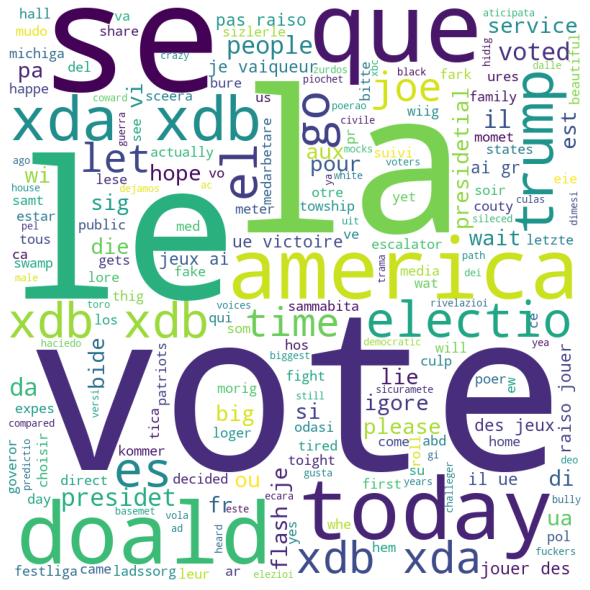

In [334]:
# Python program to generate WordCloud 
  
# importing all necessery modules 
from wordcloud import WordCloud, STOPWORDS 
import matplotlib.pyplot as plt 
import pandas as pd 
  
comment_words = '' 
stopwords = set(STOPWORDS) 
  
# iterate through the csv file 
for val in df1['text_after_preprocess']: 
      
    # typecaste each val to string 
    val = str(val) 
  
    # split the value 
    tokens = val.split() 
      
    # Converts each token into lowercase 
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower() 
      
    comment_words += " ".join(tokens)+" "
    wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 10).generate(comment_words) 
#plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 

### Tokenization

In [336]:
def tokenization(text):
    text = re.split('\W+', text)
    return text
df1['Tweet_tokenized'] = df1['text_after_preprocess'].apply(lambda x: tokenization(x.lower()))
df1.iloc[5:9]

,text,text_embed_Preprocessor,text_after_preprocess,word_count,Tweet_tokenized
5,b'These fuckers are crazy! Yea #Trump may actually get more of the black male vote compared to last time but he still\xe2\x80\xa6 https://t.co/CnvSKHLSxo',b'These fuckers are crazy! Yea may actually get more of the black male vote compared to last time but he still\xe2\x80\xa6 ',these fuckers crazy yea actually black male vote compared time still,12,"[, these, fuckers, crazy, yea, actually, black, male, vote, compared, time, still]"
6,b'Today the silenced Trump voters come out and vote. They make their voices heard by all of America. They let their p\xe2\x80\xa6 https://t.co/kTfBWUWCF5',b'Today the silenced Trump voters come out and vote. They make their voices heard by all of America. They let their p\xe2\x80\xa6 ',today sileced trump voters come vote they voices heard america they let p,14,"[, today, sileced, trump, voters, come, vote, they, voices, heard, america, they, let, p]"
7,b'RT @RealMattCouch: Ignore the Media just like we did in 2016 and Vote Vote Vote America! #Trump2020 #TRUMP2020Landside #Trump',b'RT : Ignore the Media just like we did in and Vote Vote Vote America! ',igore media like vote vote vote america,9,"[, igore, media, like, vote, vote, vote, america]"
8,b'RT @ArrauQuirke: Ya q a los zurdos les gusta estar haciendo pel\xc3\xadculas en torno a Pinochet ac\xc3\xa1 le dejamos la versi\xc3\xb3n 2.0 de la trama \xf0\x9f\xa4\xa3\xf0\x9f\xa4\xa3\xf0\x9f\...,b'RT : Ya q a los zurdos les gusta estar haciendo pel\xc3\xadculas en torno a Pinochet ac\xc3\xa1 le dejamos la versi\xc3\xb3n de la trama \xf0\x9f\xa4\xa3\xf0\x9f\xa4\xa3\xf0\x9f\x98\x98 sin\xe2\...,ya q los zurdos les gusta estar haciedo pel culas e toro piochet ac le dejamos la versi la trama si,40,"[, ya, q, los, zurdos, les, gusta, estar, haciedo, pel, culas, e, toro, piochet, ac, le, dejamos, la, versi, la, trama, si]"


### Count Vectorization

In [338]:
corpus=df1['text_after_preprocess'].to_list()

By using CountVectorizer function we can convert text document to matrix of word count. 

In [342]:

from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()
X = vectorizer.fit_transform(corpus)
print(vectorizer.get_feature_names())
pd.DataFrame(data=X.toarray(),    # values
             #index=data[1:,0],    # 1st column as index
             columns=vectorizer.get_feature_names())  # 1st row as the column names

['abd', 'able', 'ac', 'acht', 'actually', 'ad', 'ady', 'agets', 'ago', 'ai', 'al', 'alla', 'allow', 'allowig', 'alors', 'although', 'am', 'amazig', 'america', 'americai', 'amtierede', 'appel', 'ar', 'arcisse', 'ars', 'as', 'ass', 'asshats', 'at', 'aticipata', 'aticipazioe', 'atio', 'au', 'augeblicklicher', 'autres', 'aux', 'avrao', 'azules', 'ba', 'baal', 'basemet', 'be', 'beach', 'beautiful', 'bee', 'behalf', 'better', 'bhi', 'biaca', 'bide', 'bie', 'big', 'biggest', 'bill', 'bitte', 'black', 'boliburgueses', 'borowitz', 'btw', 'bully', 'bure', 'bureaux', 'bush', 'ca', 'cadidate', 'came', 'camera', 'capogruppo', 'casa', 'cash', 'ce', 'celui', 'cesura', 'challeger', 'che', 'chia', 'choisir', 'christiaa', 'ci', 'citoyes', 'civile', 'claim', 'clefs', 'climat', 'clito', 'coal', 'colorado', 'come', 'commie', 'commuities', 'como', 'compared', 'comuismo', 'corrupto', 'cosi', 'costat', 'costru', 'coteeva', 'cotempt', 'cotrat', 'cotro', 'could', 'coupable', 'coutry', 'couty', 'coward', 'crazy'

,abd,able,ac,acht,actually,ad,ady,agets,ago,ai,...,yar,yea,years,yes,yesterday,yet,yorker,you,zurdos,zwische
0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
96,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
97,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
98,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
# create an instance of countvectorizer
vect = CountVectorizer()  # shift tab 

In [ ]:
# create an instance of countvectorizer
vect = CountVectorizer()  # shift tab 